In [19]:
'''Importing libraries for functionalities'''

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy.signal import butter,filtfilt,find_peaks,hilbert

In [3]:
datafile=pd.read_csv('groundvib.csv')#reading file
datafile.fillna(0)#replacing nan values by zero.
datafile.describe()

,Time,X,Y,Z
count,9.420000e+02,942.000000,942.000000,942.000000
mean,1.589198e+12,0.037140,-0.027069,0.998997
std,1.734725e+04,0.002922,0.002701,0.016401
min,1.589198e+12,0.003901,-0.051690,0.573461
25%,1.589198e+12,0.036085,-0.028283,0.997706
50%,1.589198e+12,0.037060,-0.027308,0.999657
75%,1.589198e+12,0.039011,-0.025357,1.001607
max,1.589198e+12,0.069245,-0.010728,1.136195


In [4]:
t=np.linspace(0,60,942)

In [5]:
#As the generated data is primarily in Z component so we'll be using Z axis to demostrate separation of relevant seismic wave.
a1=datafile.iloc[:,1]
a2=datafile.iloc[:,2]
a3=datafile.iloc[:,3]
data=datafile.iloc[:,3]
#De-meaning the data,correcting for offset by subtraction of mean of data from all elements 
data=data-np.ones_like(data)*np.mean(data)


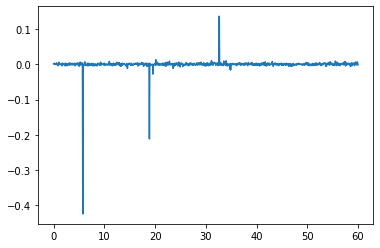

In [6]:
plt.plot(t,data)

In [7]:
butter_filter=butter(N=2,Wn=0.01,btype='highpass',analog=False,output='ba')#Lowermost measurable frequency
#setting critical frequency =0.01 of Nyquist frequency
data_Filt1=np.sqrt(8/3)*filtfilt(butter_filter[0],butter_filter[1],data)#applying filter on data, data_Filt1=data filtered by first filter

def return_mult(data):
    '''This function returns the value of multiplier to mean in order to set threshold of amplitude. '''
    # the floor function returns nearest integer samller than given number
    k=math.floor(max(abs(data))/np.mean(abs(data)))
    return k
return_mult(data_Filt1)

131

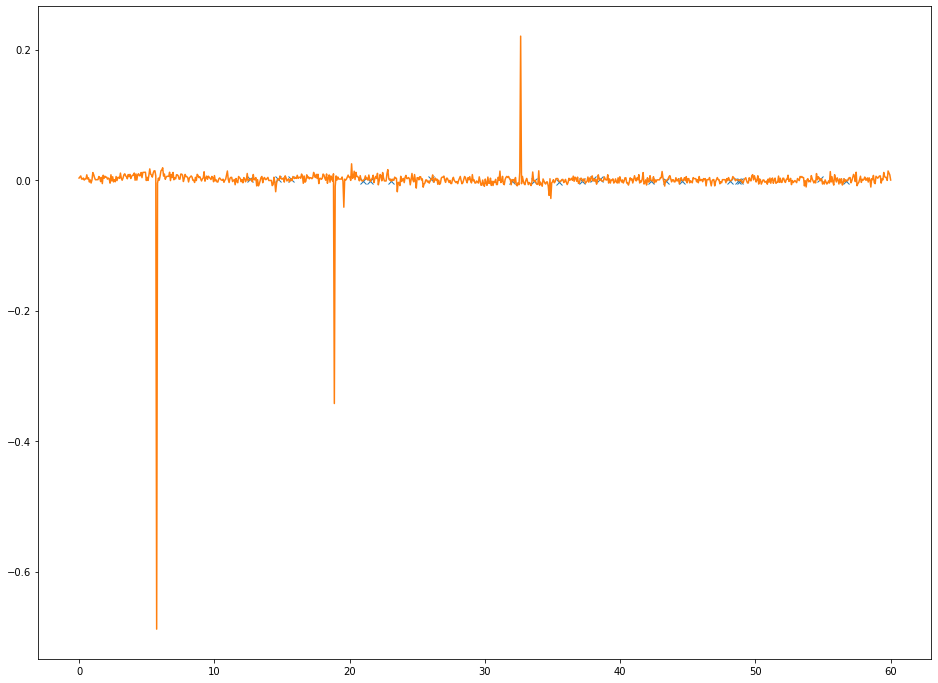

In [8]:
'''Visualising separtion of seismic part from data stream'''

k=return_mult(data_Filt1)/3

#storing locations and heights of the points where amplitude meets the required threshold.
location,heights=find_peaks(abs(data_Filt1),height=(0.001*(k)*np.mean(abs(data_Filt1)),0.01*(k+1)*np.mean(abs(data_Filt1))))
plt.figure(figsize=(16,12))
plt.plot(location*60/942,data_Filt1[location],'x')#the blue x visible are the locations selected.
plt.plot(t,data_Filt1)

In [9]:
'''Now to ensure min difference between the parts we need to cut. '''
diff=np.diff(location)  
location

array([199, 231, 246, 329, 338, 362, 408, 503, 528, 557, 584, 597, 605,
       664, 681, 700, 756, 765, 767, 860, 890], dtype=int64)

In [10]:
'''As it is clear from list location, even after marking values for separation 
we need to select the minimum time interval of event we want to isolate, Here
I have chosen 0.02*50= 1 s'''

a=list()
for i in range(np.size(diff)):
    if diff[i]>=3*942/60:
        a.append(i)
a

[2, 6, 12, 15, 18]

In [11]:
'''Storing the separate signals as elements of list'''

Separate_signal=list()
if location[0]!=0:
    Separate_signal.append(data_Filt1[:location[0]])
for i in range(np.size(a)):
    Separate_signal.append(data_Filt1[location[a[i]]:location[a[i]+1]])
if location[-1]!=953:
    Separate_signal.append(data_Filt1[location[-1]:])
np.size(Separate_signal)

7

C:\Users\anmol harshana\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


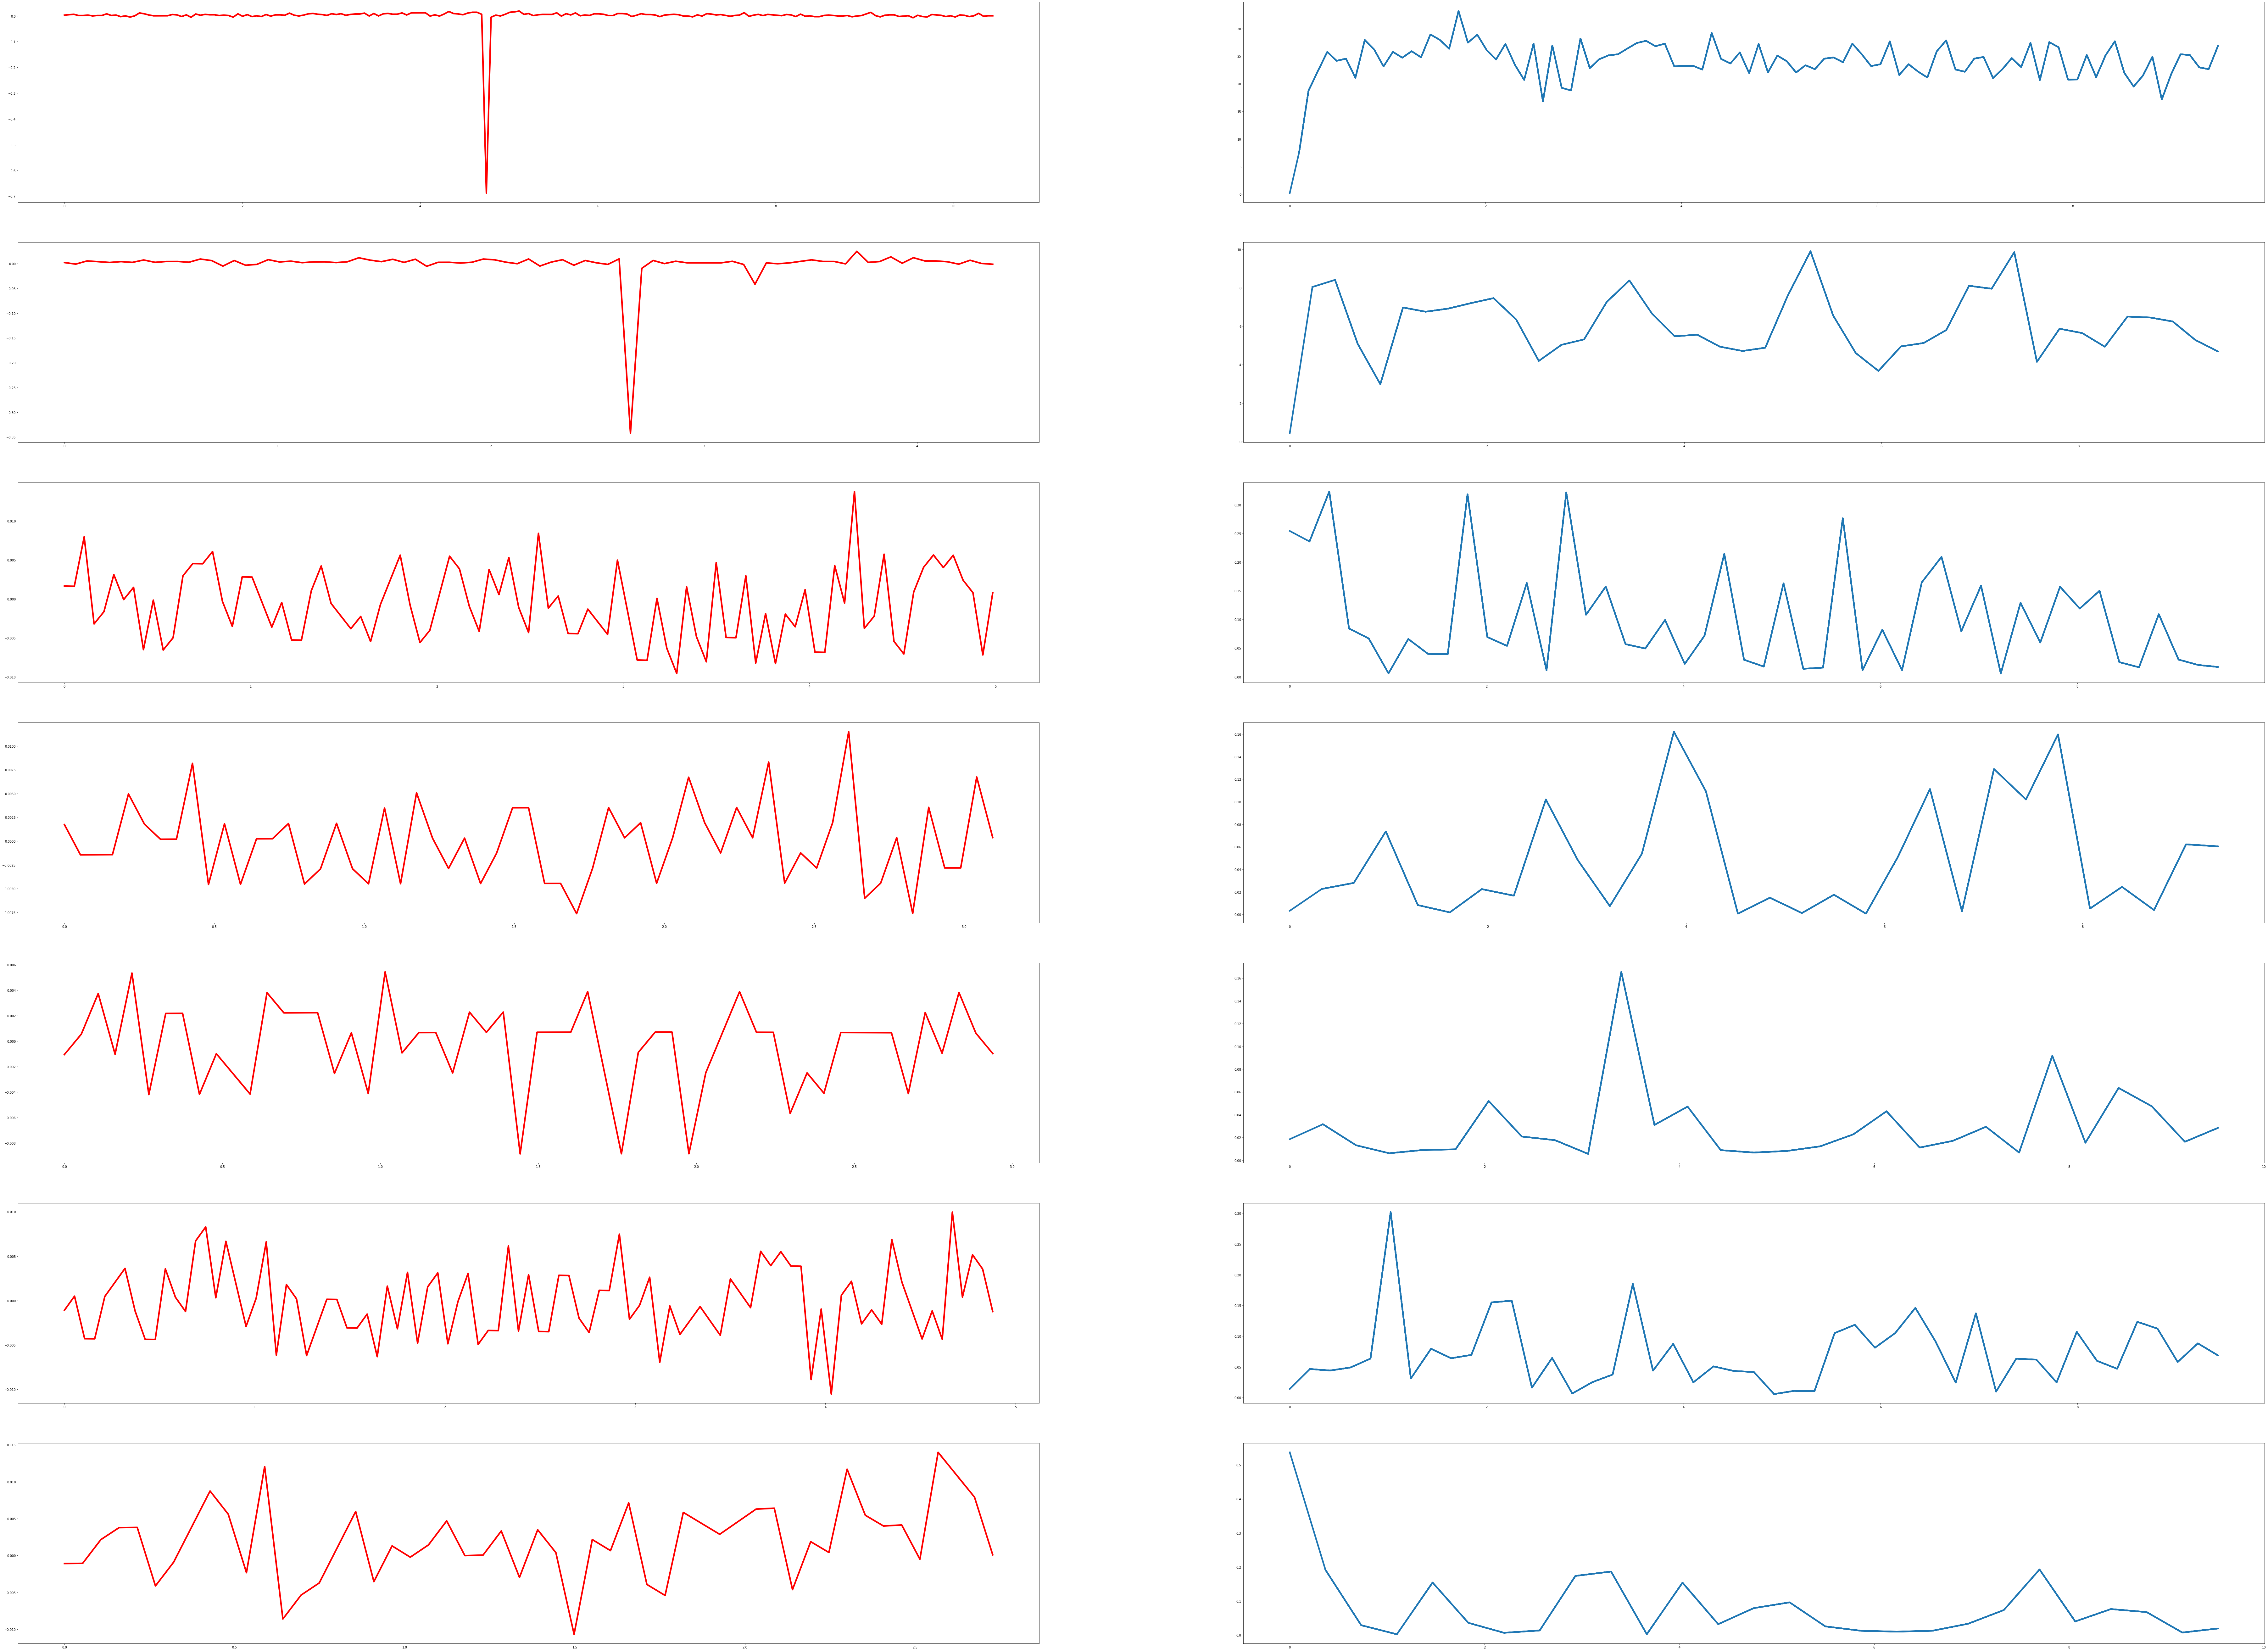

In [12]:
'''Plotting the different events separated with power spectral density'''

plt.figure(figsize=(128,96))#Specifying size of figure,To view full size double click on image

for i in range(np.size(Separate_signal)):
    
    t=np.linspace(0,50/953*np.size(Separate_signal[i]),np.size(Separate_signal[i]))
    plt.subplot(np.size(Separate_signal), 2, 2*i+ 1)#specifying index of subplot
    plt.plot(t,Separate_signal[i],linewidth=5,color='r')
    #plotting power spectral density
    ffta=np.fft.fft(Separate_signal[i])
    fftfreq=np.fft.fftfreq(np.size(Separate_signal[i]),50/953)
    Power_spectral=(ffta*np.conjugate(ffta))*50#Power spectral density= Amplitude^2/Delta(f)
    #where Delta(f)=1/T T=50 s
    plt.subplot(np.size(Separate_signal),2,2*(i+1))
    plt.plot(abs(fftfreq),Power_spectral,linewidth=5)
    

In [13]:

x=list()
if location[0]!=0:
    x.append(a1[:location[0]])
for i in range(np.size(a)):
    x.append(a1[location[a[i]]:location[a[i]+1]])
if location[-1]!=832:
    x.append(a1[location[-1]:])
np.size(x)

y=list()
if location[0]!=0:
    y.append(a2[:location[0]])
for i in range(np.size(a)):
    y.append(a2[location[a[i]]:location[a[i]+1]])
if location[-1]!=832:
    y.append(a2[location[-1]:])
np.size(y)


z=list()
if location[0]!=0:
    z.append(a3[:location[0]])
for i in range(np.size(a)):
    z.append(a3[location[a[i]]:location[a[i]+1]])
if location[-1]!=832:
    z.append(a3[location[-1]:])
np.size(x)


a1=x[1]
a2=y[1]
a3=z[1]

In [14]:
butter_filter=butter(2,(0.04/25,0.06/25),btype='bandpass')

#Calculating the resultant magnitude by addition of all three components.(squaring and adding)

Magnitude_Swave=np.sqrt(8/3)*np.sqrt(filtfilt(butter_filter[0],butter_filter[1],a1)**2+filtfilt(butter_filter[0],butter_filter[1],a2)**2+filtfilt(butter_filter[0],butter_filter[1],a3)**2)
Mean_S=np.mean(Magnitude_Swave)
butter_filter=butter(2,(0.99/25,1.01/25),btype='bandpass')

#Calculating the resultant magnitude by addition of all three components.(squaring and adding)

Magnitude_Pwave=np.sqrt(8/3)*np.sqrt(filtfilt(butter_filter[0],butter_filter[1],a1)**2+filtfilt(butter_filter[0],butter_filter[1],a2)**2+filtfilt(butter_filter[0],butter_filter[1],a3)**2)
Mean_p=np.mean(Magnitude_Pwave)

In [15]:
Ratio=Mean_S/Mean_p
print(Ratio)
if Ratio>1.3:#criteria picked from paper
    print('Probably Earthquake')
else:
    print('Probably Impact')

15.0449070349
Probably Earthquake


In [16]:
from obspy.signal.trigger import ar_pick
p=ar_pick(a3,a1,a2, samp_rate=19, f1=0.02, f2=9.5, lta_p=2, sta_p=0.1, lta_s=0.5, sta_s=0.1, m_p=2 ,m_s=2, l_p=0.2, l_s=0.2, s_pick=True)
print(p)

(1.3157894611358643, 0.0)


In [17]:
def simple_P_and_S(accl_NS,accl_EW,accl_UP,time_period,thresh_p_high=0.15,thresh_s_low=0.45,thresh_s_high=0.90):
    '''accl_NS=acceleration in north south direction
    accl_EW=acceleration in east west direction
    accl_UP=acceleration in vertical direction
    time_period=time difference between two readings
    thresh_p_high=highest amplitude for p wave detection
    thresh_s_low=lowest amplitude threshold for s wave
    thresh_s_high=highest amplitude threshhold for s wave
    Returns index for p and s values in form of two arrays
    
    '''
    length=np.size(accl_NS) # length of data stream
    Input=np.zeros(shape=[3,length]) # 
    
    Input_norm=np.zeros_like(Input)
    Input[0]=accl_NS
    Input[1]=accl_EW
    Input[2]=accl_UP
    p=list()
    s=list()
    Y_2_t=np.zeros_like(Input)# Here the three streams of data are stored in a single 2D array, for ease of access
    
    for i in range(3):
        Input_norm[i]=Input[i]/max(abs(Input[i]))# Normalising input streams as given in the paper
    Envelope=np.zeros_like(Input) 
    time=np.arange(0,length*time_period,time_period)# creating time vector
    for i in range(3):
        Envelope[i] =hilbert(Input_norm[i])# calculating envelope using hilbert function 
        Y_2_t[i]=np.sqrt(Input_norm[i]**2+np.real(Envelope[i]*np.conjugate(Envelope[i])))# calculating y_2 as mentioned
        thresh_p_low=np.mean(Input_norm[i,:60])
    for y in Y_2_t:
        
        print(max(abs(y)))# This may prove useful to judge the paramaters to set
        
        Deriv=np.diff(y)/0.02 # here I have differentiated by f()
        
        for i in range(np.size(y)):
            if y[i]>thresh_p_low:
                if y[i]<thresh_p_high and Deriv[i]<0:
                    p.append(i)
                    break
        
        for i in range(np.size(y)):
            if y[i]>thresh_s_low:
                if y[i]<thresh_s_high and Deriv[i]<0:
                    s.append(i)
                    break
    return p,s

In [20]:
simple_P_and_S(accl_NS=a1,accl_EW=a2,accl_UP=a3,time_period=942/60,thresh_p_high=0.15,thresh_s_low=0.45,thresh_s_high=0.90)

1.41421356237
1.41421356237
1.41421356237


C:\Users\anmol harshana\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


([], [3])